In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\User\Downloads\Sales_data_zone_wise.csv")
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


# 1.The mean sales generated by each zone

In [4]:
mean_A=data.groupby("Month")["Zone - A"].mean().mean()
print("Mean of Zone-A=",mean_A)
mean_B=data.groupby("Month")["Zone - B"].mean().mean()
print("Mean of Zone-B=",mean_B)
mean_C=data.groupby("Month")["Zone - C"].mean().mean()
print("Mean of Zone-C=",mean_C)
mean_D=data.groupby("Month")["Zone - D"].mean().mean()
print("Mean of Zone-D=",mean_D)

Mean of Zone-A= 1540493.1379310344
Mean of Zone-B= 1755559.5862068965
Mean of Zone-C= 1772871.0344827587
Mean of Zone-D= 1842926.7586206896


# 2.Total sales generated by all the zones for each month

In [18]:
data['Total Sales'] = data.sum(axis=1,numeric_only=True)

In [19]:
data[['Month','Total Sales']]

,Month,Total Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


# 3.To check whether all the zones generate the same amount of sales.

In [ ]:
Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

One way ANOVA tells whether two or more groups are similar or not based on their mean similarity and f-score.

Here, there are four treatments (Zone A, Zone B, Zone C, and Zone D), which are groups for ANOVA analysis.

Reponse Variable is Month
and Explanatary variables are Zones which has 4 levels.

The hypothesis that being tested here are:
Ho: μ1 = μ2 = μ3 = μ4
Ha: not all the μ's are equal
Where:
μ1 = mean of sales of Zone A
μ2 = mean of sales of Zone B
μ3 = mean of sales of Zone C
μ4 = mean of sales of Zone D

Are the conditions that allow us to safely use the ANOVA F-test met?

Assumptions


1.Observations in each sample are independent and identically distributed (iid).
2.Observations in each sample are normally distributed.
3.Observations in each sample have the same variance.


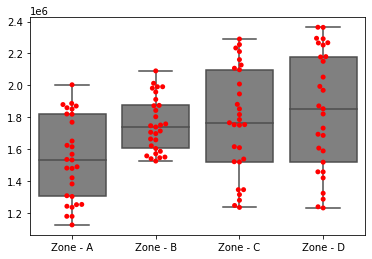

In [24]:
#1. Since the samples are monthly sales data zone wise, they are independent. 
#Total number of samples are 29 for each zone. Hence the data is balanced.

#2. Generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences between different treatment

ax = sns.boxplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']],color='grey')
ax = sns.swarmplot(data=data[['Zone - A','Zone - B','Zone - C','Zone - D']], color='red')
plt.show()

In [25]:
import scipy.stats as st

In [26]:
#3.As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances.
#Null hypothesis: samples from populations have equal variances.

w, pvalue = st.bartlett(data['Zone - A'], data['Zone - B'], data['Zone - C'], data['Zone - D'])
print(w, pvalue)
if pvalue<0.05:
    print('Since pvalue is <0.05, it is insignificant, we fail to reject null hypothesis and conclude that treatments have equal variances.')
else:
        print('Since pvalue is >0.05, it is significant, we reject null hypothesis and conclude that treatments have equal variances.')

17.702116144839334 0.0005066588319796149
Since pvalue is <0.05, it is insignificant, we fail to reject null hypothesis and conclude that treatments have equal variances.


In [27]:
#Proceeding with ANOVA one-way as conditions for one way ANOVA F-test are met. 

fstat,pvalue = st.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

print("p-value for 5% significance is: ", pvalue)
if pvalue<0.05:
    print("Since pvalue obtained is significant (p<0.05),we reject null hypothesis and conclude that the zones probably have different mean sales.")
else:
    print("Since pvalue obtained in not significant (p>0.05), we fail to reject null hypothesis and conclude thatthe zones probably have equal mean sales.")

p-value for 5% significance is:  0.0011827601694503335
Since pvalue obtained is significant (p<0.05),we reject null hypothesis and conclude that the zones probably have different mean sales.
